In [107]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from PIL import Image
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import seaborn as sns

sns.set_style("white")
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['pdf.fonttype'] = 'truetype'

%load_ext jupyter_spaces

The jupyter_spaces extension is already loaded. To reload it, use:
  %reload_ext jupyter_spaces


In [ ]:
%%space ssim
img = img_as_float(data.camera())
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1

noise_right_half=noise.copy()
noise_right_half[:,:noise_right_half.shape[1]//2]=0
noise_right_half=np.abs(noise_right_half)

noise2=noise.copy()
noise2[:,noise2.shape[1]//2:]*=0.3
noise2=np.abs(noise2)

img_noise = np.clip(img + noise, 0, 1)
img_const = np.clip(img + abs(noise), 0, 1)
img_rev = np.clip(img + noise2, 0, 1)
img_right_half = np.clip(img + noise_right_half, 0, 1)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12.5, 8), sharex=True, sharey=True)
ax = axes

mse_none = mean_squared_error(img, img)
ssim_none, S_none = ssim(img, img, data_range=img.max() - img.min(), full=True)

mse_noise = mean_squared_error(img, img_noise)
ssim_noise, S_noise = ssim(img, img_noise, data_range=img_noise.max() - img_noise.min(), full=True)

mse_const = mean_squared_error(img, img_const)
ssim_const, S_const = ssim(img, img_const, data_range=img_const.max() - img_const.min(), full=True)

mse_half = mean_squared_error(img, img_right_half)
ssim_half, S_half = ssim(img, img_right_half, data_range=img_right_half.max()-img_right_half.min(), full=True)

mse_rev = mean_squared_error(img, img_rev)
ssim_rev, S_rev = ssim(img, img_rev, data_range=img_rev.max()-img_rev.min(), full=True)

ax[0,0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0,0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0,0].set_title('Original image')
ax[1,0].imshow(S_none, cmap=plt.cm.gray, vmin=S_none.min(), vmax=S_none.max())

ax[0,1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0,1].set_xlabel(f'MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[0,1].set_title('Image with noise')
ax[1,1].imshow(S_noise, cmap=plt.cm.gray, vmin=S_noise.min(), vmax=S_noise.max())

ax[0,2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0,2].set_xlabel(f'MSE: {mse_const:.2f}, SSIM: {ssim_const:.2f}')
ax[0,2].set_title('Image plus constant')
ax[1,2].imshow(S_const, cmap=plt.cm.gray, vmin=S_noise.min(), vmax=S_noise.max())


ax[0,3].imshow(img_right_half, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0,3].set_xlabel(f'MSE: {mse_rev:.2f}, SSIM: {ssim_rev:.2f}')
ax[0,3].set_title('Image right half')
ax[1,3].imshow(S_half, cmap=plt.cm.gray, vmin=S_half.min(), vmax=S_half.max())

ax[0,4].imshow(img_rev, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0,4].set_xlabel(f'MSE: {mse_rev:.2f}, SSIM: {ssim_rev:.2f}')
ax[0,4].set_title('Image reversed')
ax[1,4].imshow(S_rev, cmap=plt.cm.gray, vmin=S_noise.min(), vmax=S_noise.max())

plt.tight_layout()
plt.show()

In [54]:
def ssim_reverse(x):
    return 1-(1+x)/2

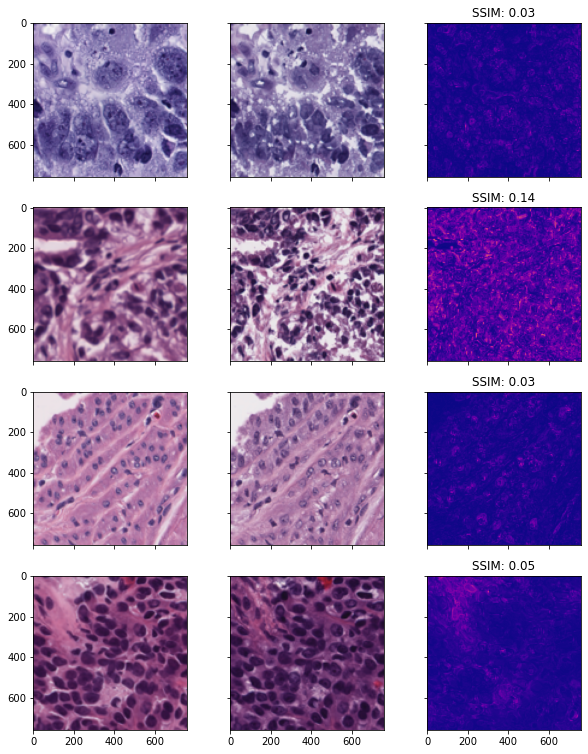

In [79]:
def display_ssim_images(images_list):
    max_images_in_comparison=max(len(t)-1 for t in images_list)
    n_cols=1+2*max_images_in_comparison
    n_rows=len(images_list)
    
    
    height=1+3*n_rows
    width=1+3*n_cols
    
    fig,axes = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(width,height),sharex=True,sharey=True)
    
    for i,img_pair in enumerate(images_list):
        img_pair_list=list()
        for img in img_pair:
            if type(img)==str:
                img=Image.open(img).convert("RGB")
            img = img_as_float(img)
            img_pair_list.append(img)
        
        axes[i,0].imshow(img_pair_list[0], vmin=0, vmax=1)
        
        for j in range(1,len(img_pair_list)):
            ssim_score, S = ssim(
                img_pair_list[0], img_pair_list[j], 
                data_range=img_pair_list[j].max() - img_pair_list[j].min(), 
                full=True, channel_axis=2
            )
            sd=ssim_reverse(S.mean(axis=2))
            sd_score=ssim_reverse(ssim_score)
            axes[i,2*j-1].imshow(img_pair_list[j],vmin=0, vmax=1)
            axes[i,2*j].imshow(sd,cmap="plasma",vmin=0,vmax=1)
            axes[i,2*j].set_title(f'SSIM: {sd_score:.2f}')
    return fig

data_dir="mutation_images/Figure 5d main figure genomic point mutations"
image_pair_list=[
    ("APC_wo","APC_w"),
    ("CDKN2A_wo","CDKN2A_w"),
    ("PTEN_wo","PTEN_w"),
    ("TP53_wo","TP53_w")
]

image_pair_list=[
    [os.path.join(data_dir,st+".png") for st in image_pair_list[i]] for i in range(len(image_pair_list))
]

display_ssim_images(image_pair_list)
plt.gcf().savefig(os.path.join(data_dir,"ssim_map.pdf"),bbox_inches="tight")
plt.show()
plt.close("all")

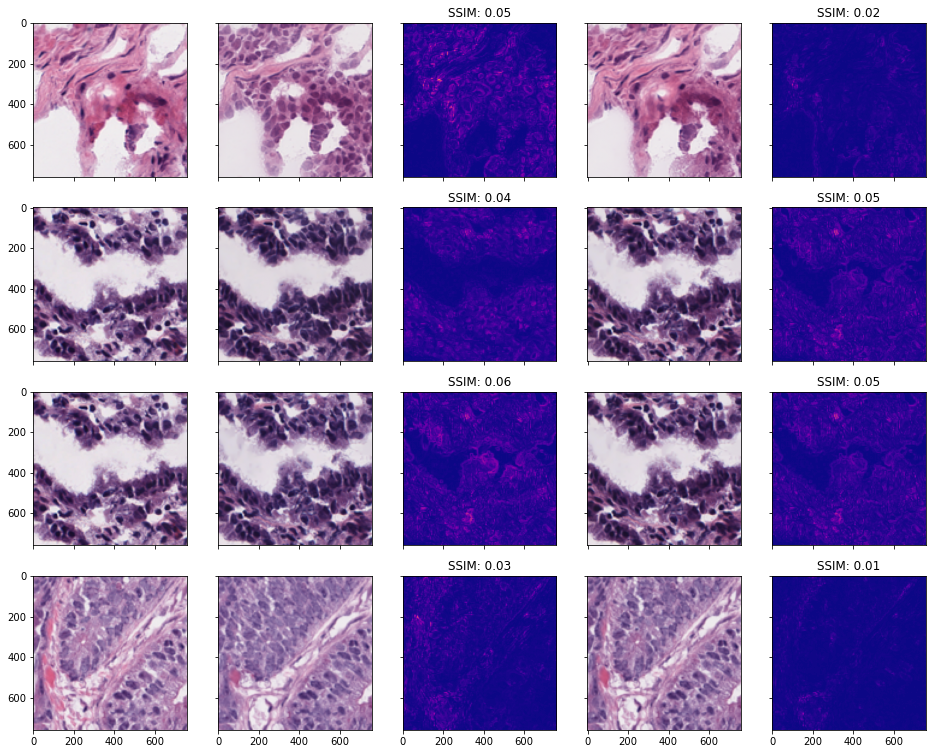

In [80]:
data_dir="mutation_images/Figure 6c transcriptomic manipulations"
image_pair_list=[
    ("OV_original","OV_G2M_down","OV_G2M_up"),
    ("UCEC_original","UCEC_G2M_down","UCEC_G2M_up"),
    ("UCEC_original","UCEC_DNA_down","UCEC_DNA_up"),
    ("COAD_original","COAD_DNA_down","COAD_DNA_up")
]

image_pair_list=[
    [os.path.join(data_dir,st+".png") for st in image_pair_list[i]] for i in range(len(image_pair_list))
]

display_ssim_images(image_pair_list)
plt.gcf().savefig(os.path.join(data_dir,"ssim_map.pdf"),bbox_inches="tight")
plt.show()
plt.close("all")

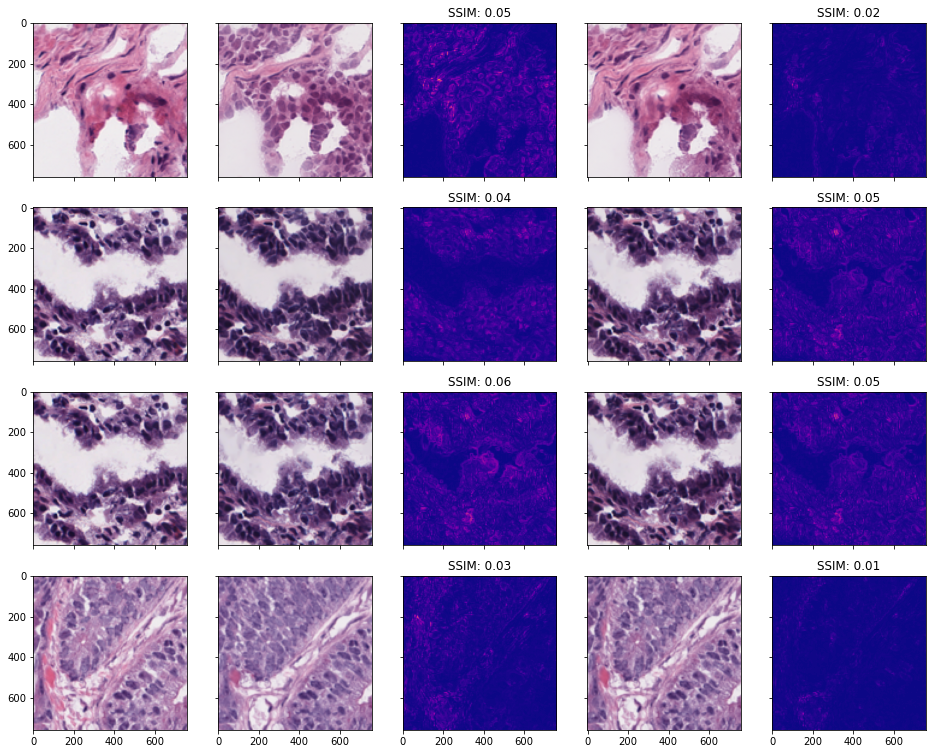

In [81]:
data_dir="mutation_images/Figure 6c transcriptomic manipulations"
image_pair_list=[
    ("OV_original","OV_G2M_down","OV_G2M_up"),
    ("UCEC_original","UCEC_G2M_down","UCEC_G2M_up"),
    ("UCEC_original","UCEC_DNA_down","UCEC_DNA_up"),
    ("COAD_original","COAD_DNA_down","COAD_DNA_up")
]

image_pair_list=[
    [os.path.join(data_dir,st+".png") for st in image_pair_list[i]] for i in range(len(image_pair_list))
]

display_ssim_images(image_pair_list)
plt.gcf().savefig(os.path.join(data_dir,"ssim_map.pdf"),bbox_inches="tight")
plt.show()
plt.close("all")

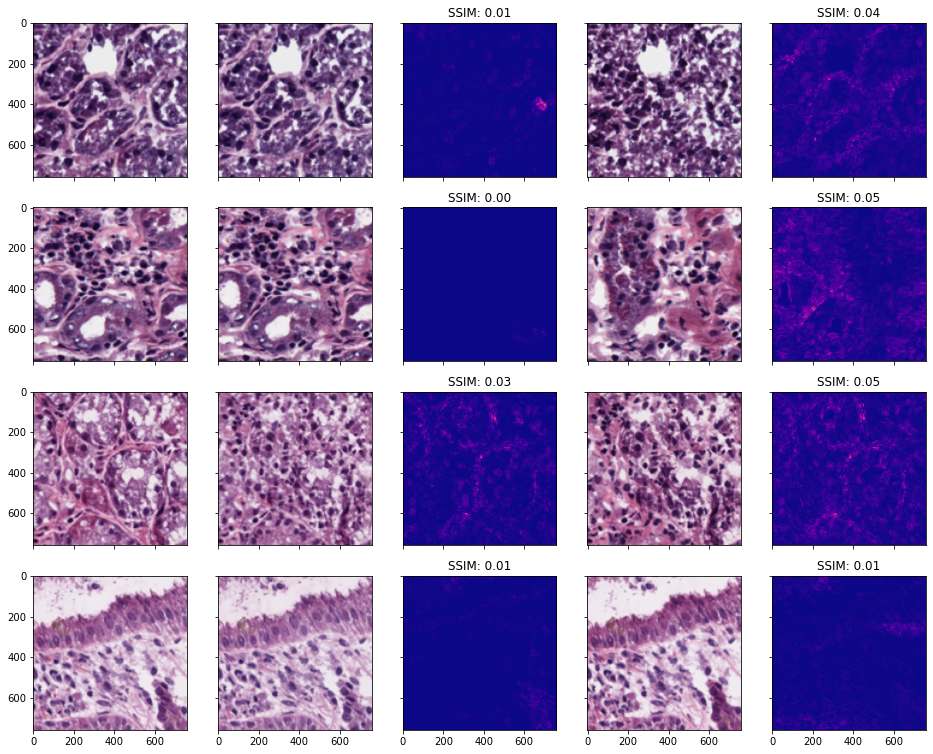

In [83]:
data_dir="mutation_images/Figure 6f immune subtypes"
image_pair_list=[
    ("ESCA_C1_original","ESCA_C1_C2","ESCA_C1_C3"),
    ("ESCA_C2_original","ESCA_C2_C1","ESCA_C2_C3"),
    ("STAD_C1_original","STAD_C1_C2","STAD_C1_C3"),
    ("STAD_C2_original","STAD_C2_C1","STAD_C2_C3"),
]

image_pair_list=[
    [os.path.join(data_dir,st+".png") for st in image_pair_list[i]] for i in range(len(image_pair_list))
]

display_ssim_images(image_pair_list)
plt.gcf().savefig(os.path.join(data_dir,"ssim_map.pdf"),bbox_inches="tight")
plt.show()
plt.close("all")

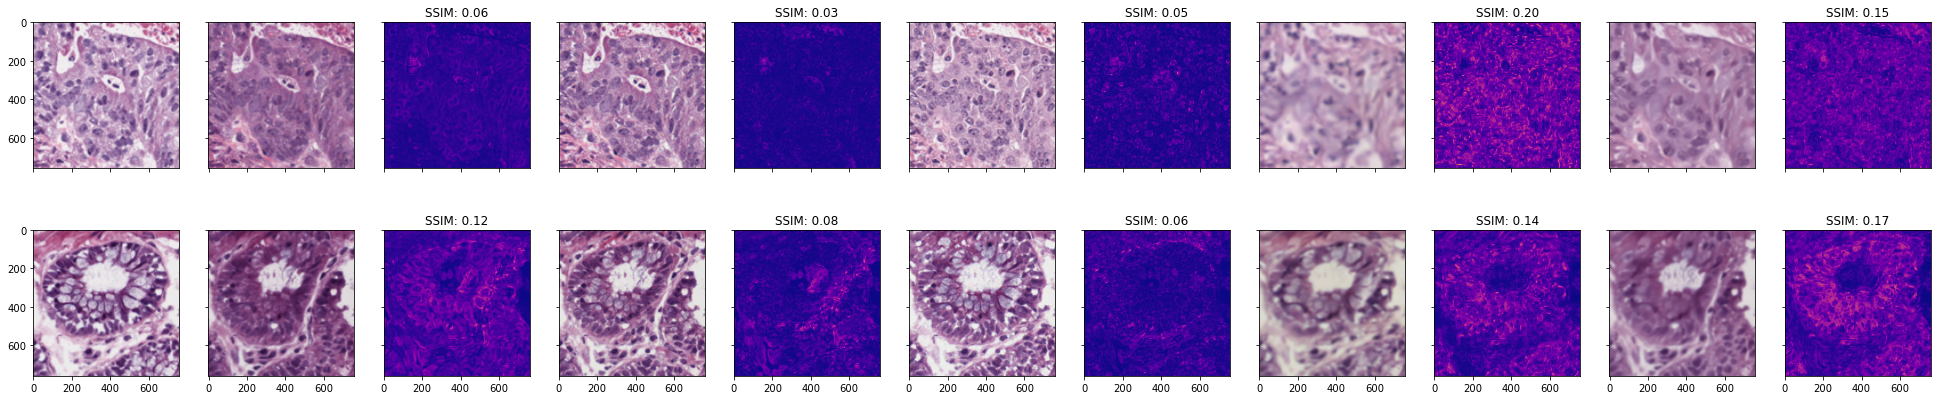

In [84]:
data_dir="mutation_images/Figure S6a supp figure genomic point mutations"
image_pair_list=[
    ("COAD_A_original","COAD_A_APC","COAD_A_TP53","COAD_A_SMAD4","COAD_A_DCHS2","COAD_A_NF1"),
    ("COAD_B_original","COAD_B_APC","COAD_B_TP53","COAD_B_SMAD4","COAD_B_DCHS2","COAD_B_NF1"),

]

image_pair_list=[
    [os.path.join(data_dir,st+".png") for st in image_pair_list[i]] for i in range(len(image_pair_list))
]

display_ssim_images(image_pair_list)
plt.gcf().savefig(os.path.join(data_dir,"ssim_map.pdf"),bbox_inches="tight")
plt.show()
plt.close("all")

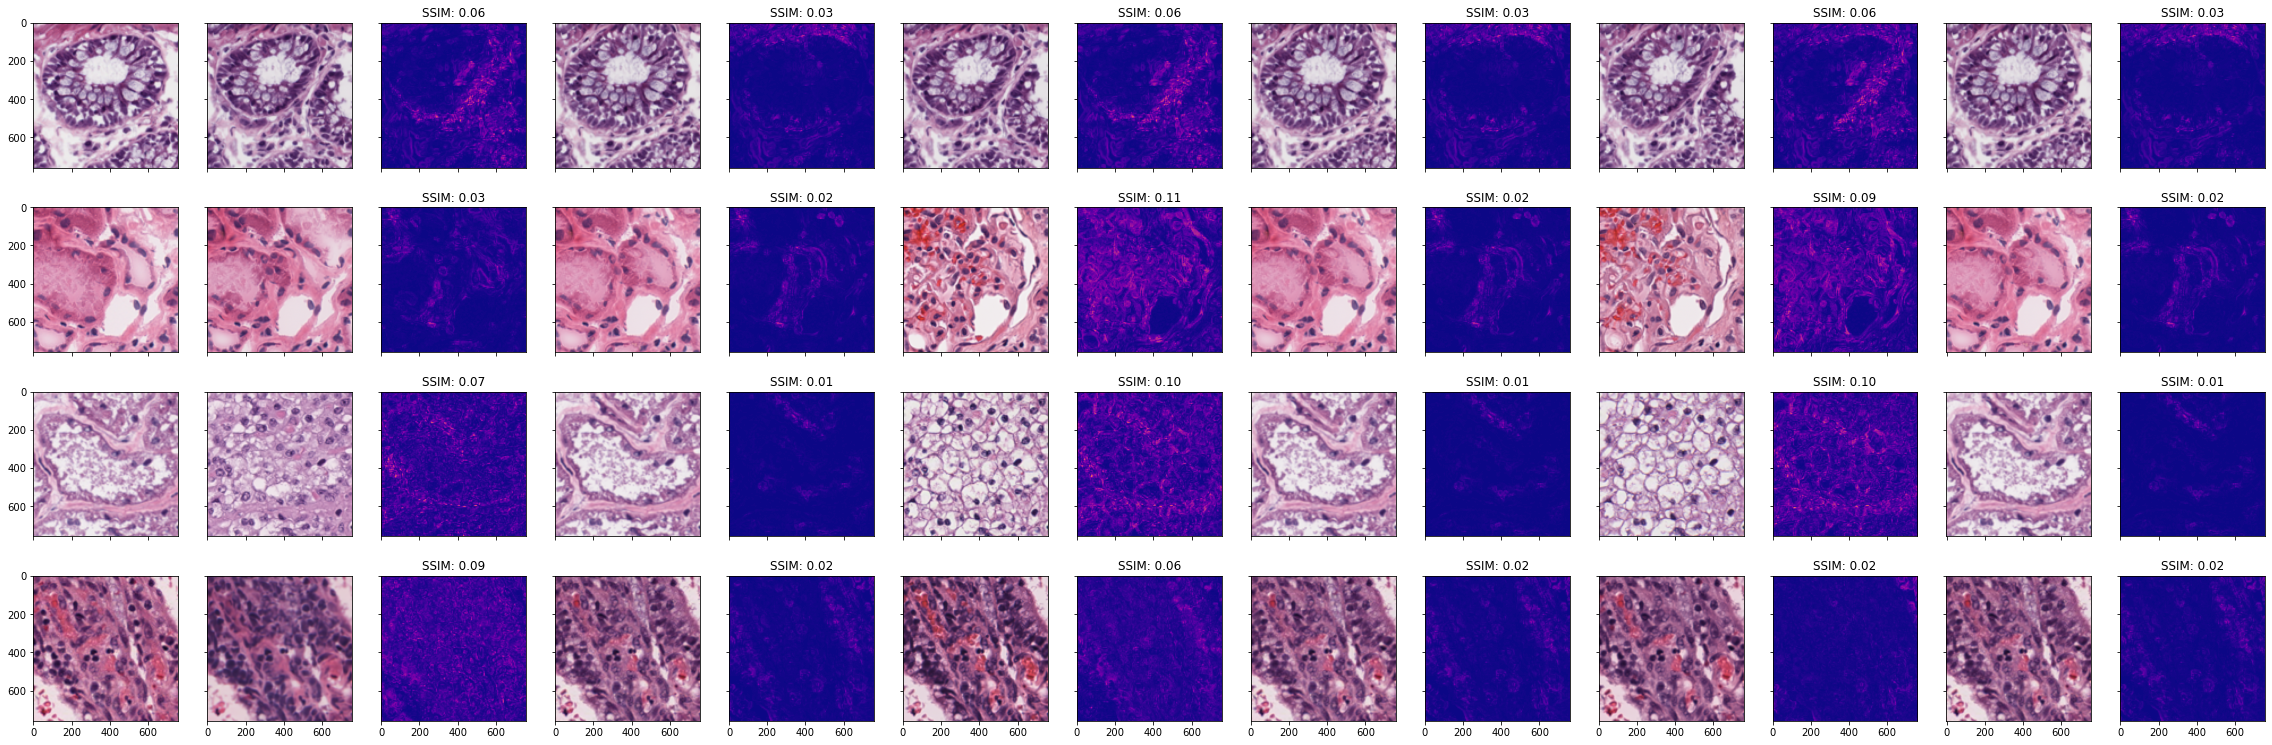

In [85]:
data_dir="mutation_images/Figure S7a supp figure transcriptomic"
image_pair_list=[
    ("COAD_original","COAD_Myc_down","COAD_Myc_up","COAD_Mito_down","COAD_Mito_up","COAD_MTORC1_down","COAD_MTORC1_up"),
    ("KICH_original","KICH_Myc_down","KICH_Myc_up","KICH_Mito_down","KICH_Mito_up","KICH_MTORC1_down","KICH_MTORC1_up"),
    ("KIRC_original","KIRC_Myc_down","KIRC_Myc_up","KIRC_Mito_down","KIRC_Mito_up","KIRC_MTORC1_down","KIRC_MTORC1_up"),
    ("READ_original","READ_Myc_down","READ_Myc_up","READ_Mito_down","READ_Mito_up","READ_MTORC1_down","READ_MTORC1_up")
]

image_pair_list=[
    [os.path.join(data_dir,st+".png") for st in image_pair_list[i]] for i in range(len(image_pair_list))
]

display_ssim_images(image_pair_list)
plt.gcf().savefig(os.path.join(data_dir,"ssim_map.pdf"),bbox_inches="tight")
plt.show()
plt.close("all")

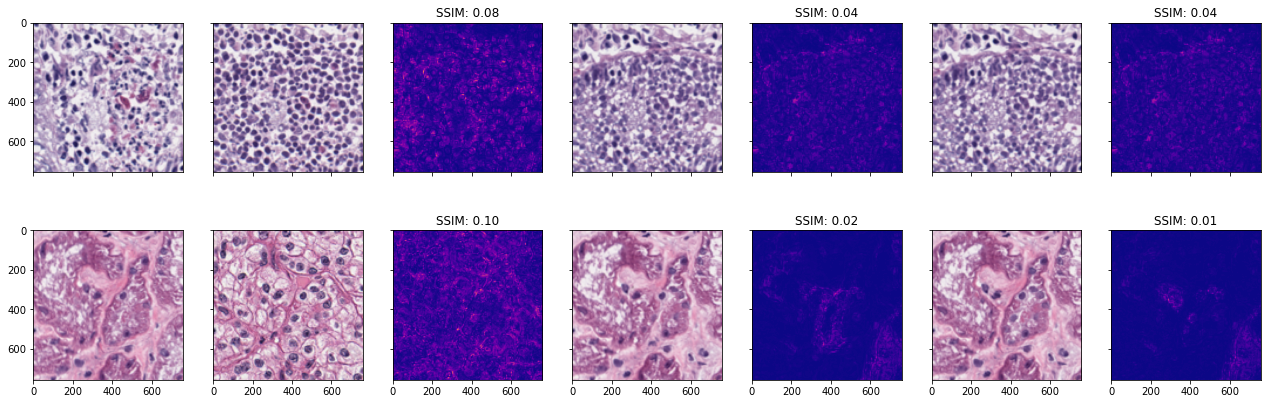

In [86]:
data_dir="mutation_images/Figure S7de supp figure CNV"
image_pair_list=[
    ("COAD_original","COAD_CCND1","COAD_MYC","COAD_PIK3CA"),
    ("KIRC_original","KIRC_CCND1","KIRC_CCNE1","KIRC_PIK3CA"),
]

image_pair_list=[
    [os.path.join(data_dir,st+".png") for st in image_pair_list[i]] for i in range(len(image_pair_list))
]

display_ssim_images(image_pair_list)
plt.gcf().savefig(os.path.join(data_dir,"ssim_map.pdf"),bbox_inches="tight")
plt.show()
plt.close("all")

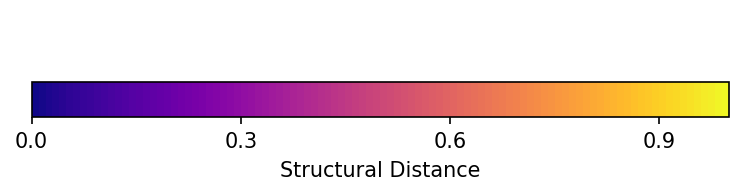

In [108]:
import matplotlib as mpl
cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=0, vmax=1)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig,ax=plt.subplots()
ax.set_axis_off()
cbar=plt.colorbar(
    mappable= sm, 
    ticks=np.arange(0,1.00,.3), 
    boundaries=np.arange(0,1.01,.01),
    fraction=1, # control the size of the colorbar axis
    shrink=1, # controls the size of colorbar,
    orientation='horizontal',
    ax=ax,
    label="Structural Distance"
)
fig.savefig("mutation_images/cbar.pdf")